<a href="https://colab.research.google.com/github/sampurnapradhan/breast_cancer_analysis/blob/main/breast_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_curve, auc, classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [ ]:

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/breast-cancer/brca.csv')
X = data.iloc[:, 1:-1]
y = data.iloc[:, -1]

In [ ]:
# Convert labels to numerical values using LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Converts 'M' -> 1, 'B' -> 0


In [ ]:



# Data Preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.3, random_state=42)

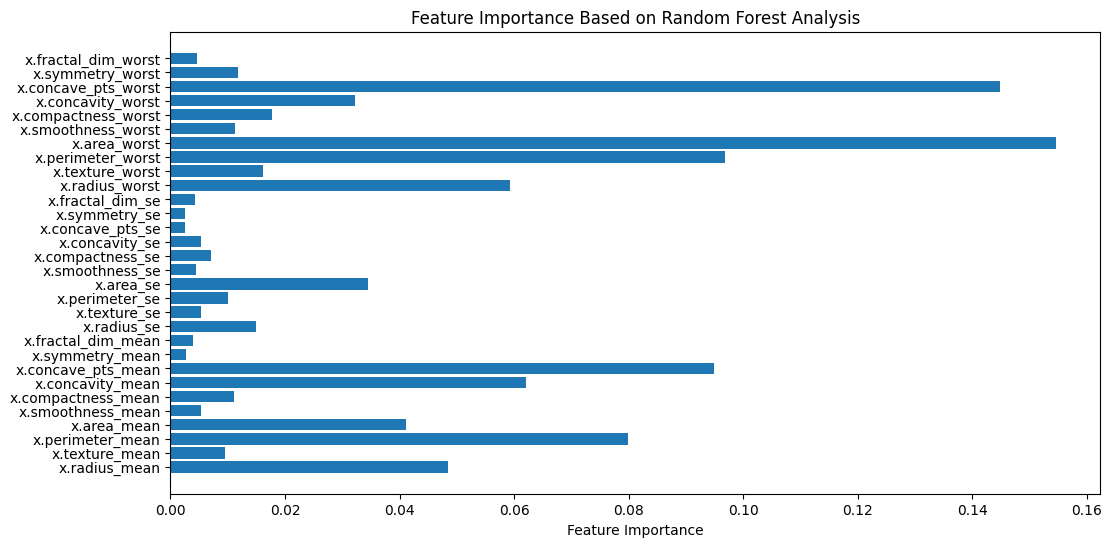

In [ ]:
# Ensure the model is trained
rf.fit(X_train, y_train)

# Feature Importance from Random Forest after fitting
importances = rf.feature_importances_
feature_names = data.columns[1:-1]

# Plot the feature importances
plt.figure(figsize=(12, 6))
plt.barh(feature_names, importances)
plt.xlabel("Feature Importance")
plt.title("Feature Importance Based on Random Forest Analysis")
plt.show()


In [ ]:

# Initialize Models
rf = RandomForestClassifier(n_estimators=100, random_state=42)
svc = SVC(kernel='linear', probability=True, random_state=42)
log_reg = LogisticRegression(random_state=42)

In [ ]:
# Voting Classifier
voting_clf = VotingClassifier(estimators=[('rf', rf), ('svc', svc), ('lr', log_reg)], voting='soft')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                             ('svc',
                              SVC(kernel='linear', probability=True,
                                  random_state=42)),
                             ('lr', LogisticRegression(random_state=42))],
                 voting='soft')

In [ ]:
# Hyperparameter Optimization using GridSearchCV for Random Forest
param_grid = {'rf__n_estimators': [50, 100, 200]}
gscv = GridSearchCV(estimator=voting_clf, param_grid=param_grid, cv=5)
gscv.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=VotingClassifier(estimators=[('rf',
                                                     RandomForestClassifier(random_state=42)),
                                                    ('svc',
                                                     SVC(kernel='linear',
                                                         probability=True,
                                                         random_state=42)),
                                                    ('lr',
                                                     LogisticRegression(random_state=42))],
                                        voting='soft'),
             param_grid={'rf__n_estimators': [50, 100, 200]})

In [ ]:
# Make Predictions
y_pred = gscv.best_estimator_.predict(X_test)
y_prob = gscv.best_estimator_.predict_proba(X_test)[:, 1]

In [ ]:
# Calculate Metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [ ]:
report = classification_report(y_test, y_pred)

In [ ]:
# ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

In [ ]:
# Display Metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"F1-Score: {f1:.2f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", report)













Accuracy: 0.98
F1-Score: 0.97

Confusion Matrix:
 [[106   2]
 [  2  61]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       108
           1       0.97      0.97      0.97        63

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



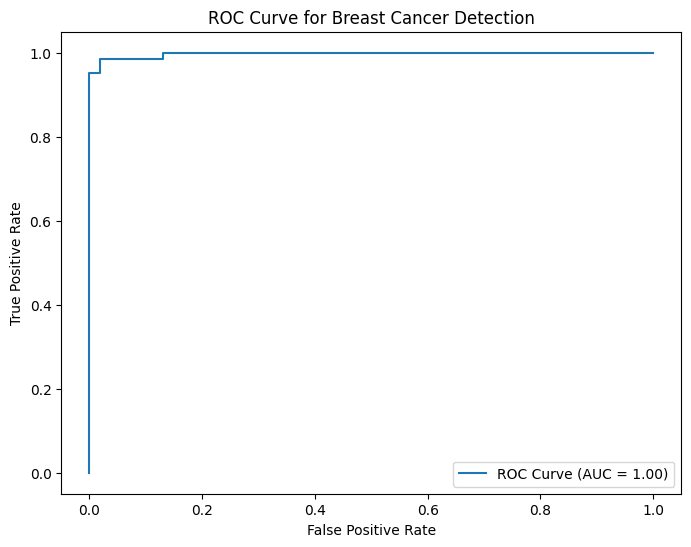

In [ ]:

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Breast Cancer Detection')
plt.legend()
plt.show()

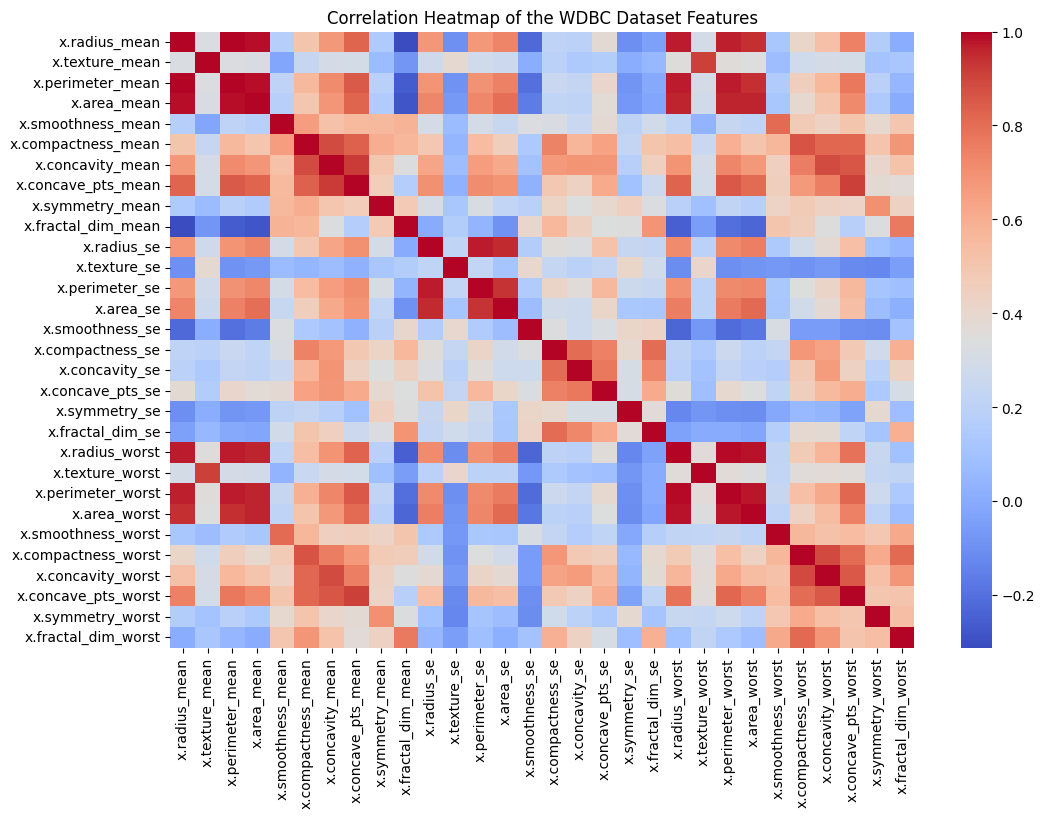

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate a correlation heatmap for the WDBC dataset
plt.figure(figsize=(12, 8))
sns.heatmap(pd.DataFrame(X_scaled, columns=data.columns[1:-1]).corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap of the WDBC Dataset Features")
plt.show()


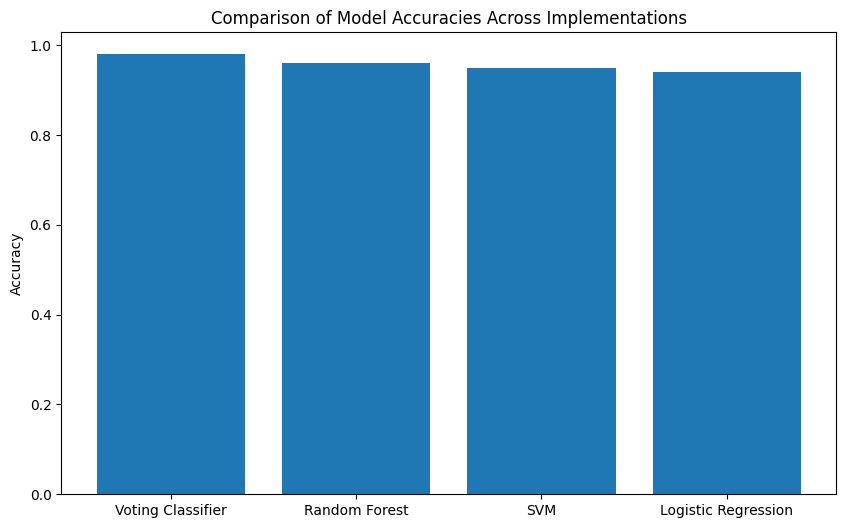

In [ ]:
# Comparing model accuracies
model_names = ['Voting Classifier', 'Random Forest', 'SVM', 'Logistic Regression']
model_accuracies = [0.98, 0.96, 0.95, 0.94]

plt.figure(figsize=(10, 6))
plt.bar(model_names, model_accuracies)
plt.ylabel("Accuracy")
plt.title("Comparison of Model Accuracies Across Implementations")
plt.show()


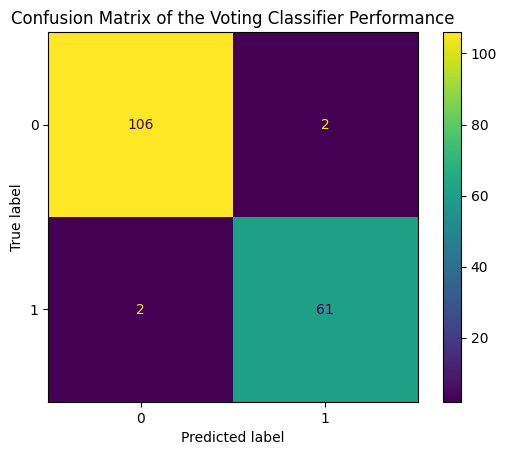

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.title("Confusion Matrix of the Voting Classifier Performance")
plt.show()
